Let's start with some import; in addition to the usual ones, we now have `FuncAnimation` - which will allow us to plot everything.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In /localhome/hi209/Codes/intelpython3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /localhome/hi209/Codes/intelpython3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /localhome/hi209/Codes/intelpython3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /localhome/hi209/Codes/intelpython3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /loca

In order to have a working animation in Jupyter, we also need the following line:

In [2]:
%matplotlib widget

Moving on, we now create a plot which we will later on animate.

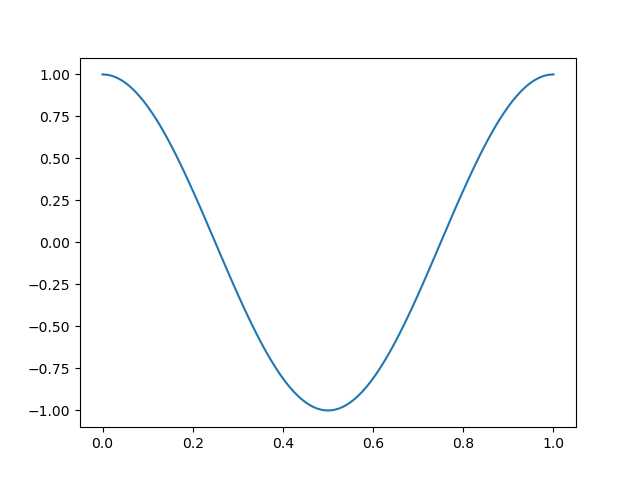

In [3]:
# create a mesh
N = 100
x = np.linspace(0,1,num=N)

# create a curve
y = np.cos(2*np.pi*x)

# plot the initial curve
fig, ax = plt.subplots()
plot_handle = ax.plot(x, y) # THIS IS IMPORTANT!
                                   # You need to create plot_handle!
                                   # We will use it later to update the plot

It is very important to allocate the variable `plot_handle`: this will be later on referenced in the animation process.

Now we have to define a function which:
1. updates (changes) the data contained in `y` (meaning, the y values of the plot)
2. updates the plot

We will call this function `time_step`; this function __must__ have __one and only one__ argument (`ii`, in this case). Notice that we are not going to actually use `ii` inside the function, but it is still required by FuncAnimation.

In [4]:
def time_step(ii): # this function MUST have only ONE argument
                   # by the way, we will never use it

    global y # using the keyword global allows us to modify y outside the function
                    # without global, changes to y would be lost after function returns

    # make changes to y:
    # use numpy's "roll" function, which moves all elements to the right by 1 cell
    # except for last cell, which becomes the first one
    y = np.roll(y,1)

    # now we need to update the plot; this is done by
    plot_handle[0].set_ydata(y)

    # and now we need to return plot_handle
    return plot_handle

Also notice how this function returns `plot_handle`; this is again required by FuncAnimation. Everything is now set to actually animate everything: to do so, we feed the function we just wrote to FuncAnimation

In [5]:
animation = FuncAnimation(fig, func=time_step, interval=15) # never forget to allocate the result of FuncAnimation
                                               # as a variable! otherwise animation won't be shown

If you have all the necessary Python modules (which should be the case if you used Anaconda), the previous plot should be now animated!